<a href="https://colab.research.google.com/github/aditya452/PROJECT/blob/main/Implementation_of_shallow_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(-1, 28, 28, 1) # 1 means single color channel
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255
X_train[0].shape

(28, 28, 1)

In [5]:
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
model = Sequential()
# Adding layers
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [6]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, y_train,epochs = 100,batch_size = 128, verbose = 1, validation_split = 0.1)

Epoch 1/100
422/422 [==============================] - 13s 5ms/step - loss: 0.3277 - accuracy: 0.9036 - val_loss: 0.0883 - val_accuracy: 0.9752
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 0.1128 - accuracy: 0.9661 - val_loss: 0.0606 - val_accuracy: 0.9845
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0792 - accuracy: 0.9761 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0628 - accuracy: 0.9815 - val_loss: 0.0469 - val_accuracy: 0.9875
Epoch 5/100
422/422 [==============================] - 2s 6ms/step - loss: 0.0512 - accuracy: 0.9841 - val_loss: 0.0476 - val_accuracy: 0.9880
Epoch 6/100
422/422 [==============================] - 2s 5ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0460 - val_accuracy: 0.9870
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0403 - val_accuracy: 0.989

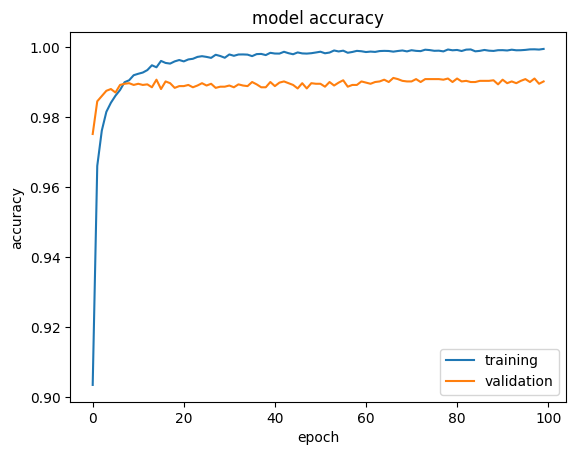

In [7]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training", "validation"], loc = "best")
plt.show();

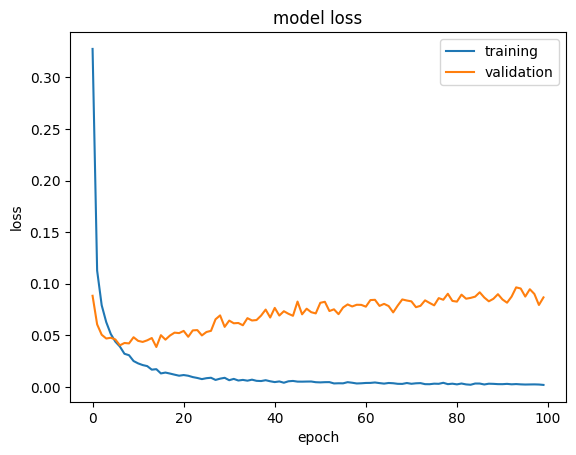

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training", "validation"], loc = "best")
plt.show();